# Import necessary libraries


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pmdarima import auto_arima
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns


In [40]:
# Load the data
tsla_data = pd.read_csv('../data/raw/TSLA_data.csv')

# Convert 'Date' column to datetime format
tsla_data['Date'] = pd.to_datetime(tsla_data['Date'], utc=True)

# Set 'Date' as the index
tsla_data.set_index('Date', inplace=True)

# Filter for the 'Adj Close' column for analysis
tsla_close = tsla_data['Adj Close']


In [41]:
tsla_data.head()


,lose,High,Low,Open,Volume,Adj Close
Date,,,,,,
2015-01-02 00:00:00+00:00,14.620667,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05 00:00:00+00:00,14.006000,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06 00:00:00+00:00,14.085333,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07 00:00:00+00:00,14.063333,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08 00:00:00+00:00,14.041333,14.041333,14.253333,14.000667,14.187333,51637500


## Step 2: Split Data into Training and Testing Sets



In [36]:
train_size = int(len(tsla_close) * 0.8)
train, test = tsla_close[:train_size], tsla_close[train_size:]


In [44]:
# Auto ARIMA to find the best parameters
stepwise_fit = auto_arima(tsla_data['Adj Close'], seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
print(stepwise_fit.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=94341.754, Time=0.96 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=94880.197, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=94727.600, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=94602.417, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=94878.198, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=94345.766, Time=0.38 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=94352.427, Time=0.30 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=94336.482, Time=0.73 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=94349.370, Time=0.38 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=94335.944, Time=0.92 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=94338.965, Time=0.56 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=94336.918, Time=1.35 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=94336.506, Time=0.78 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=94332.444, Time=2.19 sec
 ARIMA(2,1,3)(0,0,0

In [46]:
# Model Implementation
model = sm.tsa.ARIMA(tsla_data['Adj Close'], order=(3, 1, 3))
fit_model = model.fit()


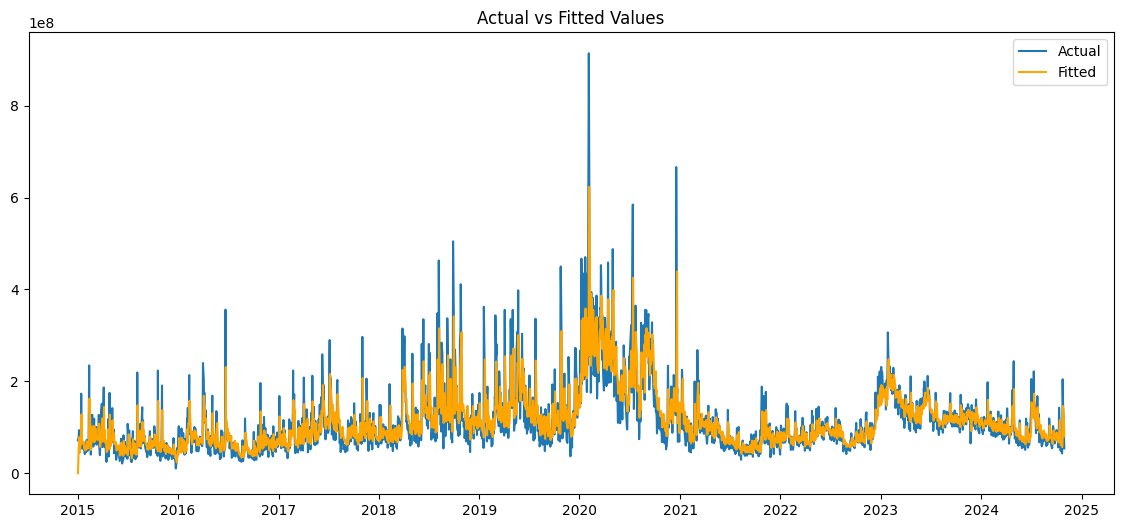

In [47]:
# 1. Plot actual vs. fitted values
plt.figure(figsize=(14, 6))
plt.plot(tsla_data['Adj Close'], label='Actual')
plt.plot(fit_model.fittedvalues, label='Fitted', color='orange')
plt.title('Actual vs Fitted Values')
plt.legend()
plt.show()

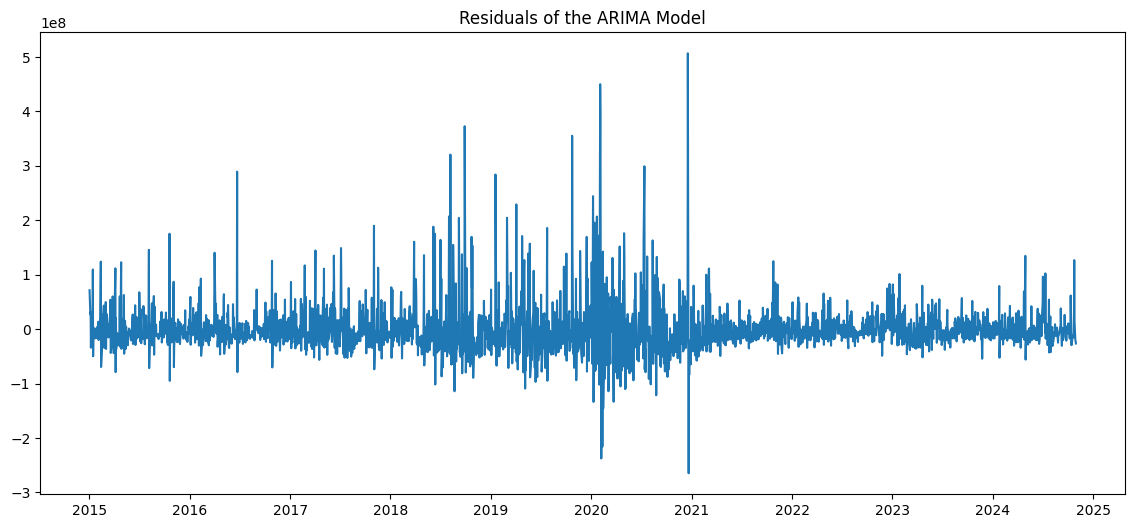

In [48]:
# 2. Residual diagnostics
# Residual plot
residuals = fit_model.resid
plt.figure(figsize=(14, 6))
plt.plot(residuals)
plt.title('Residuals of the ARIMA Model')
plt.show()

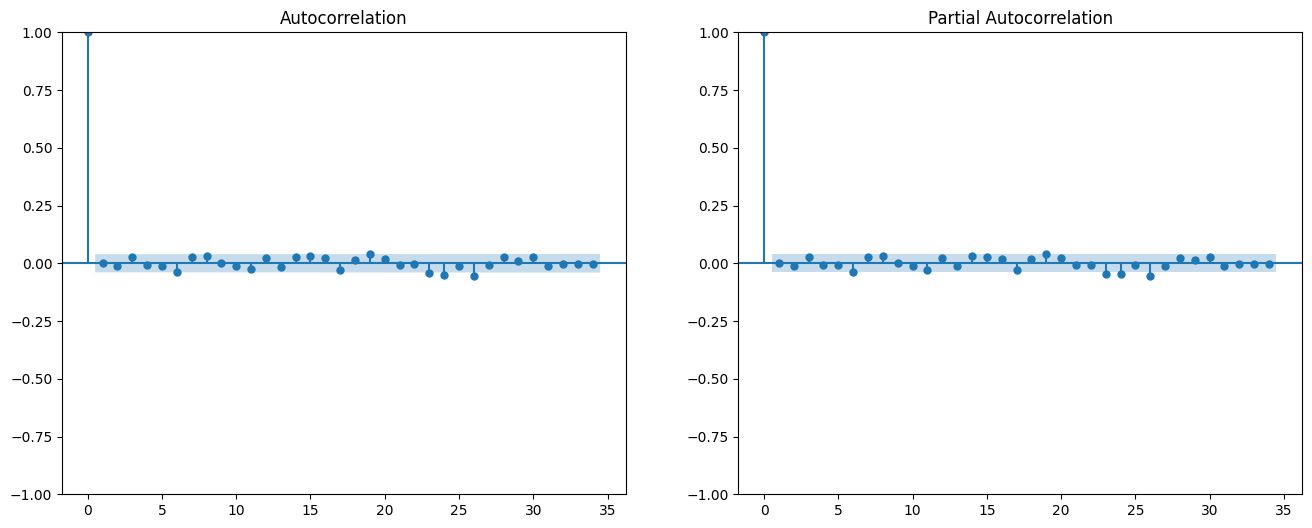

In [49]:
# 3. ACF and PACF plots for residuals
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(residuals, ax=axes[0])
plot_pacf(residuals, ax=axes[1])
plt.show()

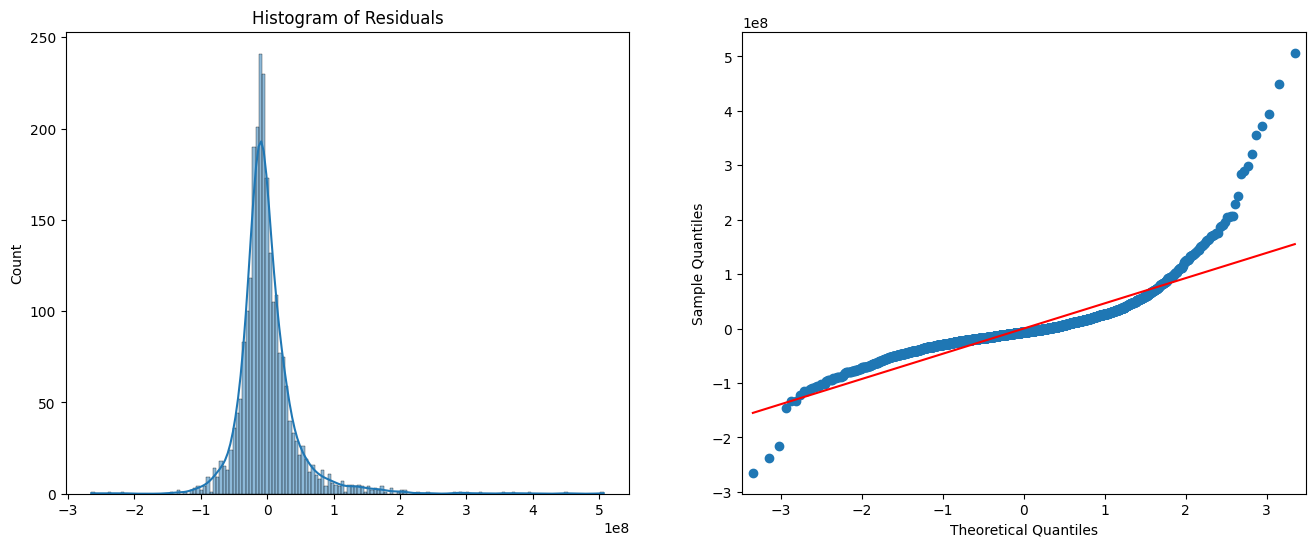

In [52]:
# 4. Histogram and QQ-Plot of residuals
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(residuals, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Residuals')
sm.qqplot(residuals, line='s', ax=axes[1])
plt.show()

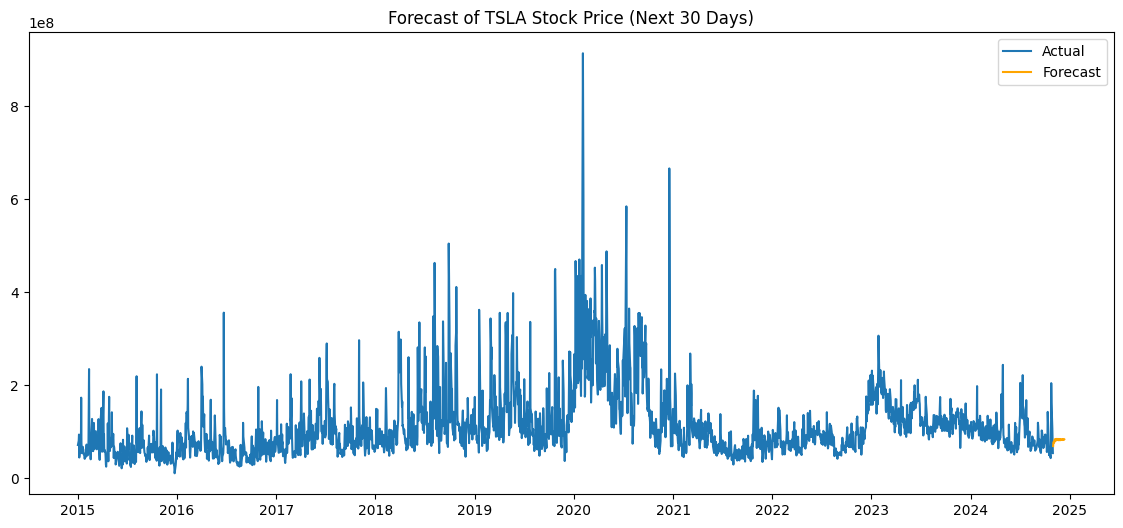

2474    6.915727e+07
2475    7.753363e+07
2476    7.662247e+07
2477    8.202909e+07
2478    8.279683e+07
2479    8.025232e+07
2480    8.428904e+07
2481    8.277546e+07
2482    8.134236e+07
2483    8.467050e+07
2484    8.219243e+07
2485    8.213471e+07
2486    8.450925e+07
2487    8.178214e+07
2488    8.283197e+07
2489    8.409774e+07
2490    8.164674e+07
2491    8.337808e+07
2492    8.358300e+07
2493    8.175592e+07
2494    8.372226e+07
2495    8.307799e+07
2496    8.203636e+07
2497    8.385446e+07
2498    8.266537e+07
2499    8.240174e+07
2500    8.380173e+07
2501    8.239286e+07
2502    8.277129e+07
2503    8.361571e+07
Name: predicted_mean, dtype: float64

In [53]:
# Forecast the next 30 days using the ARIMA model
forecast_steps = 30
forecast = fit_model.forecast(steps=forecast_steps)

# Plotting the forecasted values
plt.figure(figsize=(14, 6))
plt.plot(tsla_data.index, tsla_data['Adj Close'], label='Actual')
future_dates = pd.date_range(tsla_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='B')
plt.plot(future_dates, forecast, label='Forecast', color='orange')
plt.title('Forecast of TSLA Stock Price (Next 30 Days)')
plt.legend()
plt.show()

# Optionally, return forecasted values for further analysis
forecast


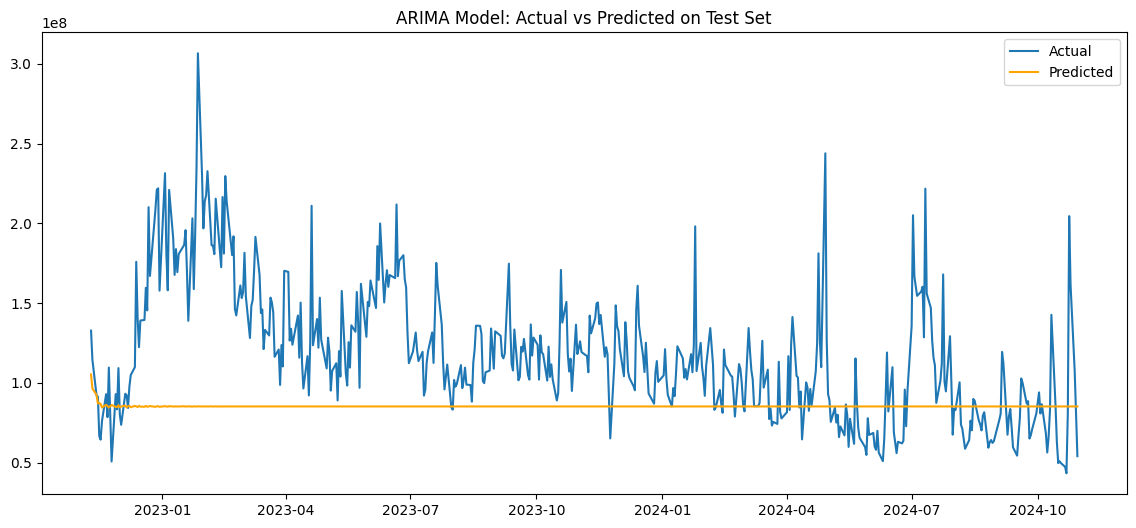

Mean Squared Error: 2719147599102919.0
Mean Absolute Error: 39064988.64901132


In [54]:
# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(tsla_data) * 0.8)
train, test = tsla_data['Adj Close'][:train_size], tsla_data['Adj Close'][train_size:]

# Fit the ARIMA model on the training data
train_model = sm.tsa.ARIMA(train, order=(3, 1, 3))
train_fit = train_model.fit()

# Predict on the test set
test_predictions = train_fit.forecast(steps=len(test))

# Plotting actual vs. predicted values
plt.figure(figsize=(14, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, test_predictions, label='Predicted', color='orange')
plt.title('ARIMA Model: Actual vs Predicted on Test Set')
plt.legend()
plt.show()

# Calculate performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(test, test_predictions)
mae = mean_absolute_error(test, test_predictions)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


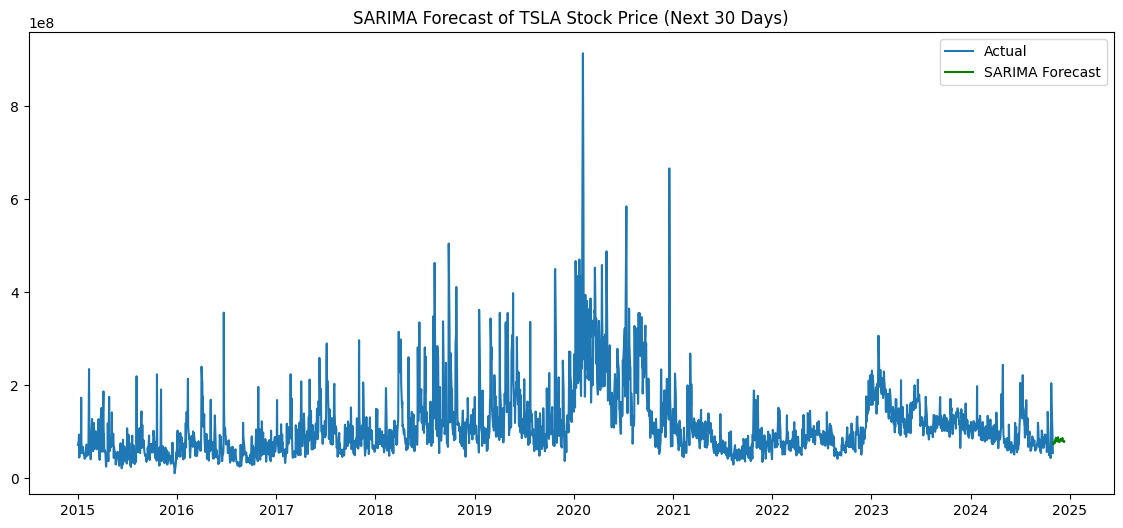

In [55]:
# Fit a SARIMA model (Seasonal ARIMA) with seasonal orders
sarima_model = sm.tsa.SARIMAX(tsla_data['Adj Close'], order=(3, 1, 3), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()

# Forecasting with the SARIMA model
sarima_forecast = sarima_fit.forecast(steps=forecast_steps)

# Plot SARIMA forecast
plt.figure(figsize=(14, 6))
plt.plot(tsla_data.index, tsla_data['Adj Close'], label='Actual')
plt.plot(future_dates, sarima_forecast, label='SARIMA Forecast', color='green')
plt.title('SARIMA Forecast of TSLA Stock Price (Next 30 Days)')
plt.legend()
plt.show()


In [56]:
# Example: Grid search for ARIMA hyperparameters
best_aic = float('inf')
best_order = None
for p in range(1, 6):
    for q in range(1, 6):
        try:
            model = sm.tsa.ARIMA(tsla_data['Adj Close'], order=(p, 1, q))
            model_fit = model.fit()
            if model_fit.aic < best_aic:
                best_aic = model_fit.aic
                best_order = (p, 1, q)
        except:
            continue
print(f'Best model: ARIMA{best_order} with AIC={best_aic}')


Best model: ARIMA(1, 1, 4) with AIC=94329.77664091196


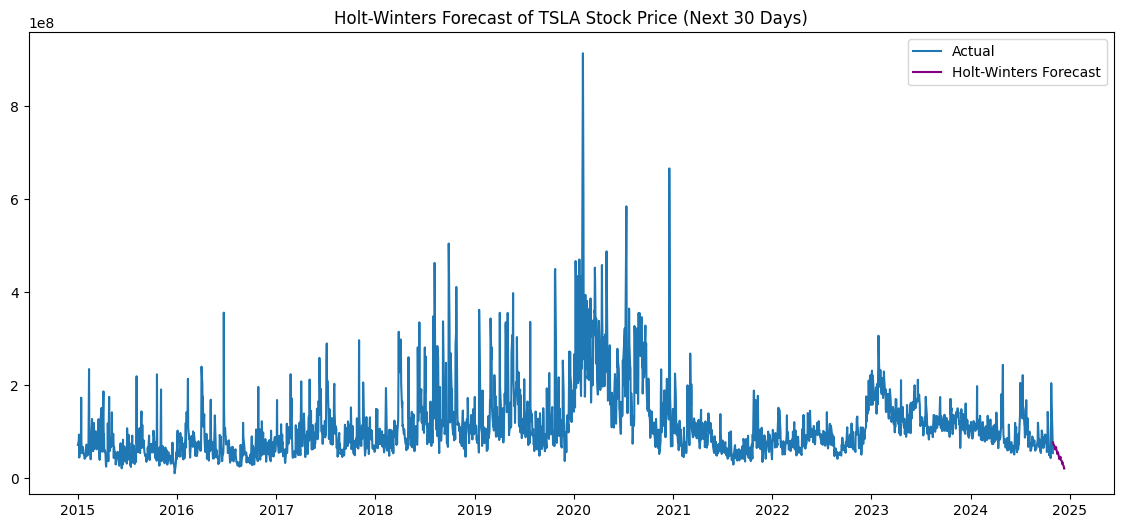

In [57]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt-Winters model
holt_model = ExponentialSmoothing(tsla_data['Adj Close'], trend='add', seasonal='add', seasonal_periods=12)
holt_fit = holt_model.fit()

# Forecast
holt_forecast = holt_fit.forecast(steps=forecast_steps)

# Plot forecast
plt.figure(figsize=(14, 6))
plt.plot(tsla_data.index, tsla_data['Adj Close'], label='Actual')
plt.plot(future_dates, holt_forecast, label='Holt-Winters Forecast', color='purple')
plt.title('Holt-Winters Forecast of TSLA Stock Price (Next 30 Days)')
plt.legend()
plt.show()


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(tsla_data['Adj Close'].values.reshape(-1, 1))

# Preparing data for LSTM model
X, y = [], []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i, 0])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)

# LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model_lstm.fit(X, y, epochs=10, batch_size=32)




Epoch 1/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0057
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0037
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0042
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0028
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0034
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0040
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0028
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0028
Epoch 9/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0025
Epoch 10/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0025
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
[[75028048.]]
